In [2]:
pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 547.6 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 554.9 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 351.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 380.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

In [5]:
df = pd.read_csv(r'C:\Users\mbugu\OneDrive\Desktop\ML DATASET\World Population by country 2024\World Population by country 2024.csv')

In [6]:
df.head()

Country  Population 2024  Population 2023 Area (km2)  Density (/km2)  \
0          India       1441719852       1428627663         3M           485.0   
1          China       1425178782       1425671352       9.4M           151.0   
2  United States        341814420        339996563       9.1M            37.0   
3      Indonesia        279798049        277534122       1.9M           149.0   
4       Pakistan        245209815        240485658     770.9K           318.0   

   Growth Rate  World %  World Rank  
0       0.0092   0.1801           1  
1      -0.0003   0.1780           2  
2       0.0053   0.0427           3  
3       0.0082   0.0350           4  
4       0.0196   0.0306           5

In [7]:
df.tail()

Country  Population 2024  Population 2023 Area (km2)  \
229        Montserrat             4372             4386        102   
230  Falkland Islands             3803             3791      12.2K   
231              Niue             1935             1935        261   
232           Tokelau             1915             1893         10   
233      Vatican City              526              518        < 1   

     Density (/km2)  Growth Rate  World %  World Rank  
229           43.00      -0.0032      NaN         230  
230            0.31       0.0032      NaN         231  
231            7.00       0.0000      NaN         232  
232          192.00       0.0116      NaN         233  
233         1195.00       0.0154      NaN         234

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [9]:
df.shape

(234, 8)

In [10]:
df.describe().T

count          mean           std       min            25%  \
Population 2024  234.0  3.468862e+07  1.380750e+08  526.0000  426456.500000   
Population 2023  234.0  3.437442e+07  1.373864e+08  518.0000  422598.250000   
Density (/km2)   234.0  4.537882e+02  1.990163e+03    0.1400      39.500000   
Growth Rate      234.0  9.200427e-03  1.137134e-02   -0.0309       0.001925   
World %          228.0  4.446491e-03  1.745914e-02    0.0000       0.000100   
World Rank       234.0  1.175000e+02  6.769417e+01    1.0000      59.250000   

                          50%           75%           max  
Population 2024  5.626359e+06  2.392272e+07  1.441720e+09  
Population 2023  5.643895e+06  2.324537e+07  1.428628e+09  
Density (/km2)   9.850000e+01  2.482500e+02  2.167400e+04  
Growth Rate      7.950000e-03  1.567500e-02  4.830000e-02  
World %          7.500000e-04  3.000000e-03  1.801000e-01  
World Rank       1.175000e+02  1.757500e+02  2.340000e+02

<Axes: >

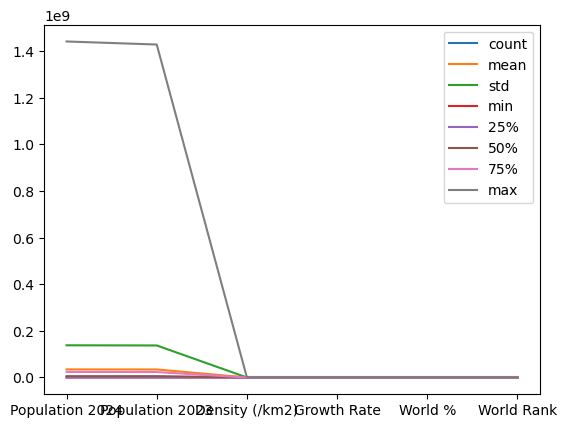

In [11]:
df.describe().T.plot()

In [12]:
df.isna().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            6
World Rank         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df

Country  Population 2024  Population 2023 Area (km2)  \
0               India       1441719852       1428627663         3M   
1               China       1425178782       1425671352       9.4M   
2       United States        341814420        339996563       9.1M   
3           Indonesia        279798049        277534122       1.9M   
4            Pakistan        245209815        240485658     770.9K   
..                ...              ...              ...        ...   
229        Montserrat             4372             4386        102   
230  Falkland Islands             3803             3791      12.2K   
231              Niue             1935             1935        261   
232           Tokelau             1915             1893         10   
233      Vatican City              526              518        < 1   

     Density (/km2)  Growth Rate  World %  World Rank  
0            485.00       0.0092   0.1801           1  
1            151.00      -0.0003   0.1780           2  
2             37.00       0.0053   0.0427           3  
3            149.00       0.0082   0.0350           4  
4            318.00       0.0196   0.0306           5  
..              ...          ...      ...         ...  
229           43.00      -0.0032      NaN         230  
230            0.31       0.0032      NaN         231  
231            7.00       0.0000      NaN         232  
232          192.00       0.0116      NaN         233  
233         1195.00       0.0154      NaN         234  

[234 rows x 8 columns]

In [15]:
top_country=df.head(5)
top_country

Country  Population 2024  Population 2023 Area (km2)  Density (/km2)  \
0          India       1441719852       1428627663         3M           485.0   
1          China       1425178782       1425671352       9.4M           151.0   
2  United States        341814420        339996563       9.1M            37.0   
3      Indonesia        279798049        277534122       1.9M           149.0   
4       Pakistan        245209815        240485658     770.9K           318.0   

   Growth Rate  World %  World Rank  
0       0.0092   0.1801           1  
1      -0.0003   0.1780           2  
2       0.0053   0.0427           3  
3       0.0082   0.0350           4  
4       0.0196   0.0306           5

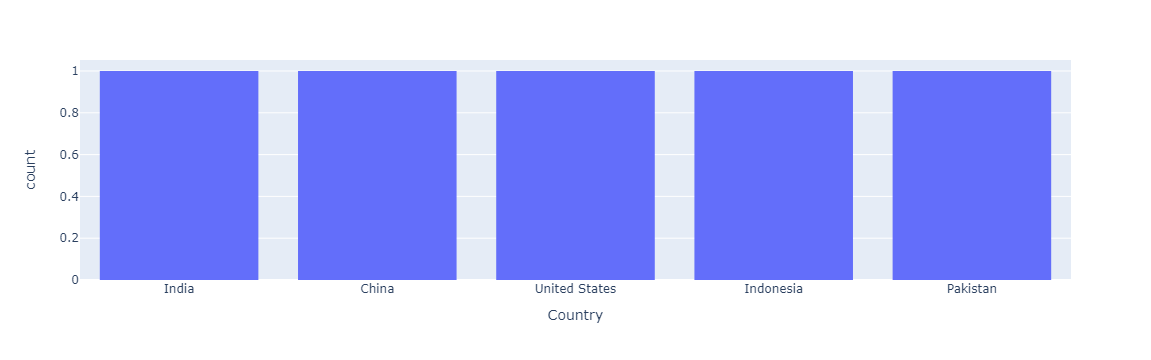

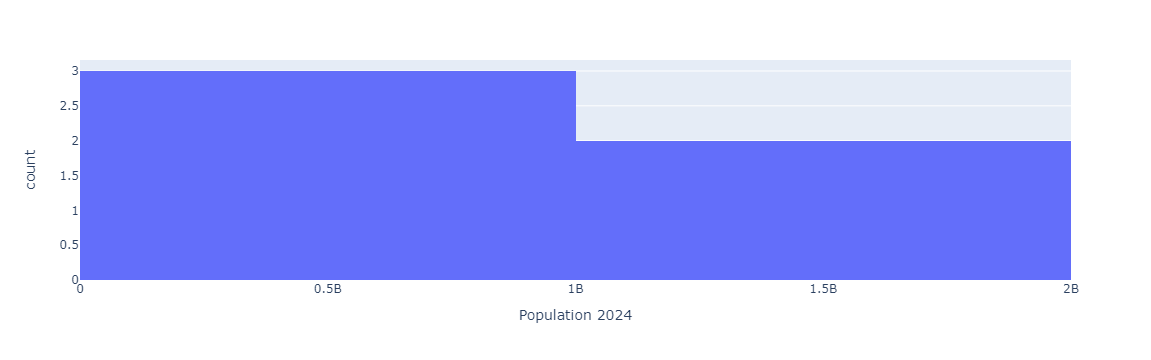

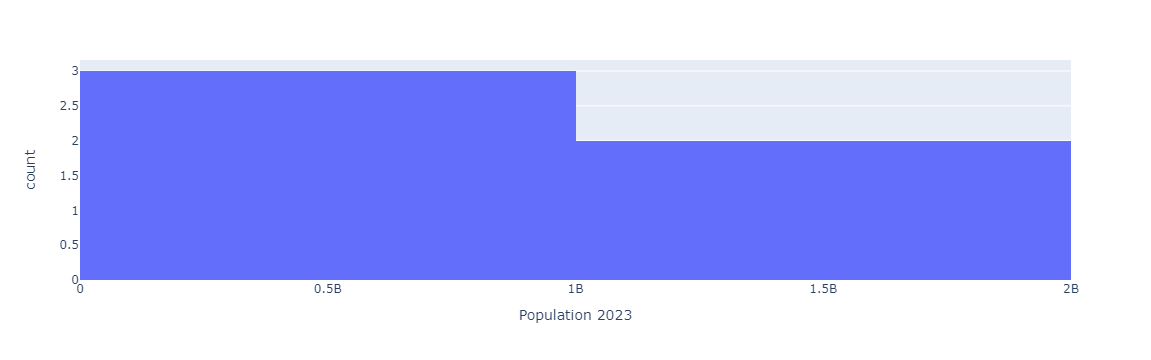

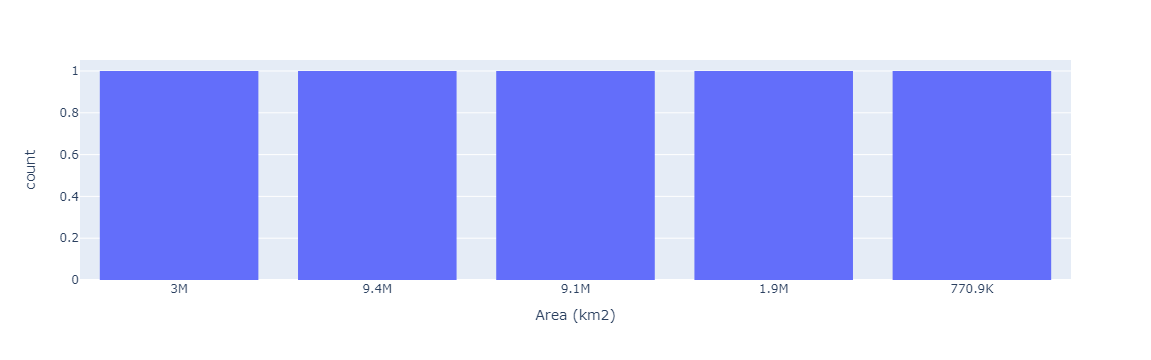

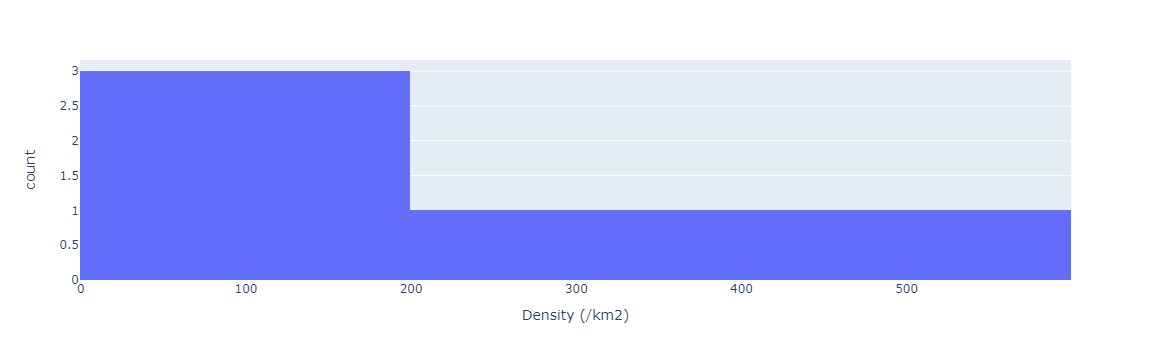

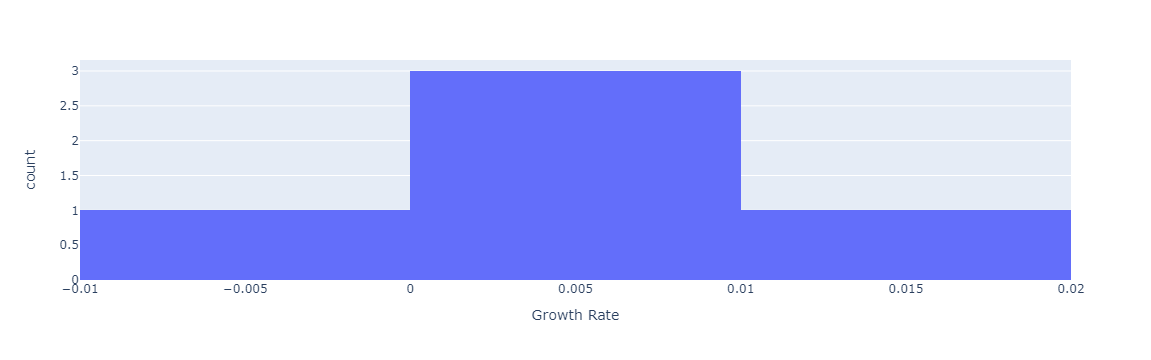

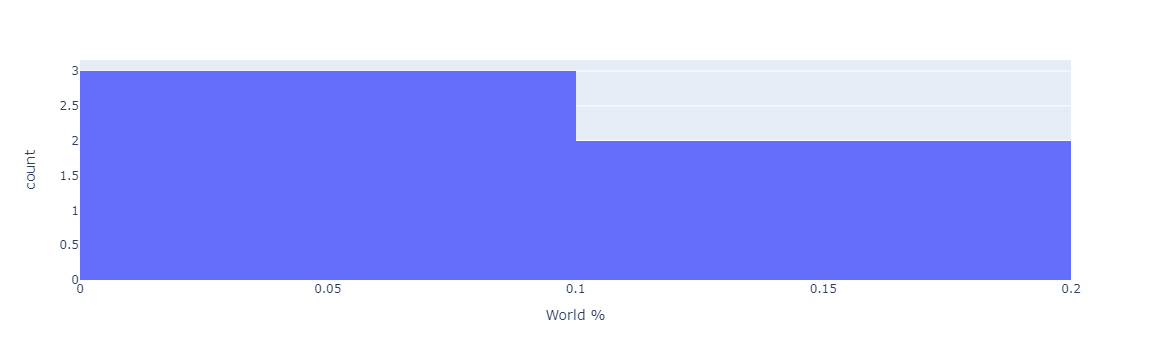

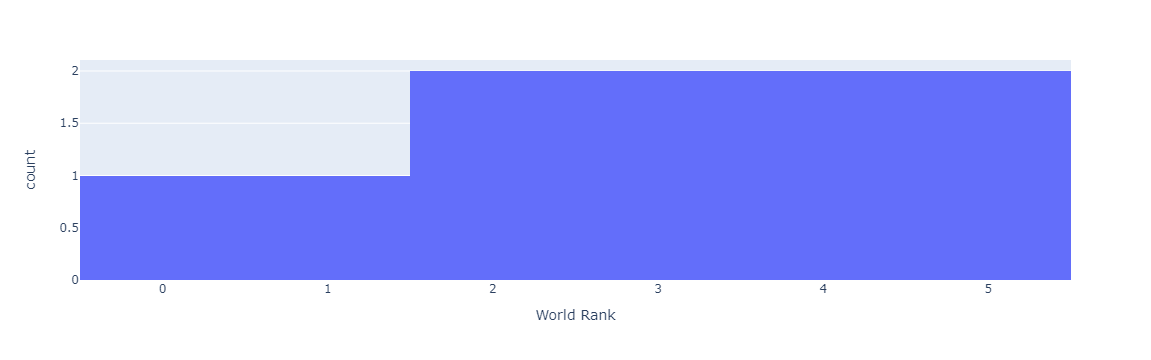

In [16]:
import plotly.express as px
df = pd.DataFrame(top_country)

columns = ['Country',
 'Population 2024',
 'Population 2023',
 'Area (km2)',
 'Density (/km2)',
 'Growth Rate',
 'World %',
 'World Rank']

for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

In [17]:
egypt= df[df['Country'] == 'Egypt']
egypt

Empty DataFrame
Columns: [Country, Population 2024, Population 2023, Area (km2), Density (/km2), Growth Rate, World %, World Rank]
Index: []

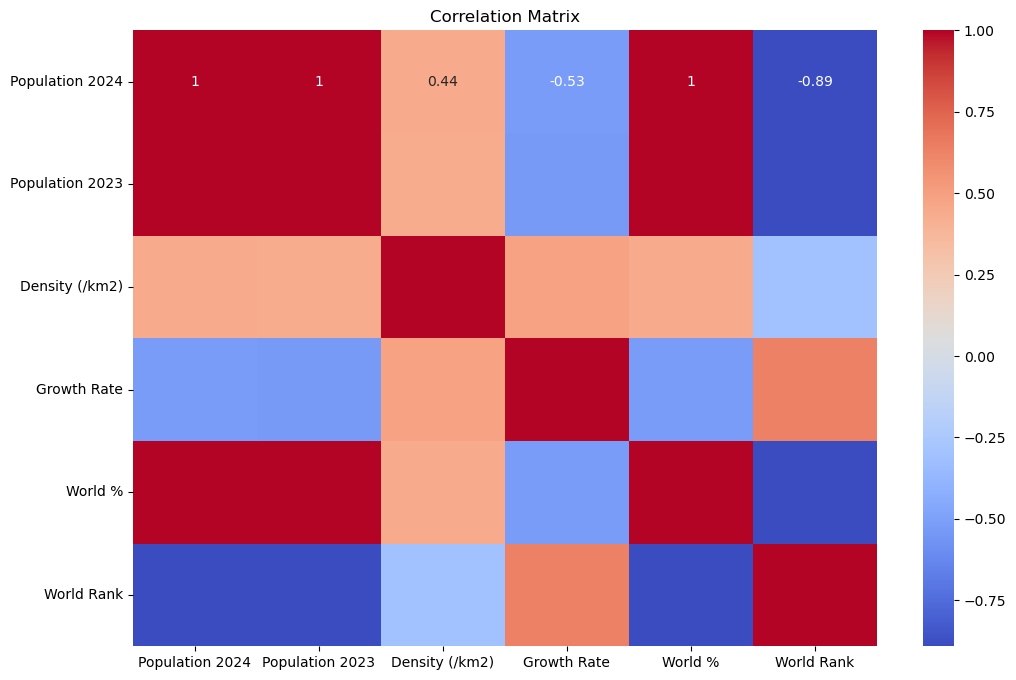

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.columns.to_list()

['Country',
 'Population 2024',
 'Population 2023',
 'Area (km2)',
 'Density (/km2)',
 'Growth Rate',
 'World %',
 'World Rank']

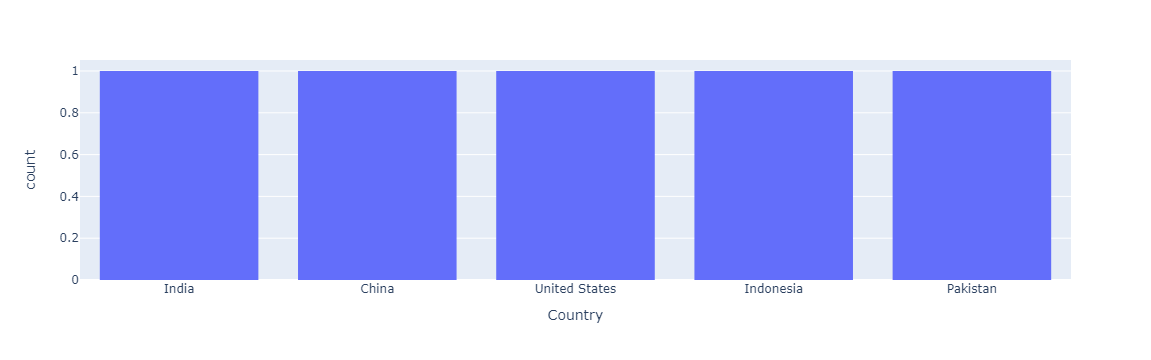

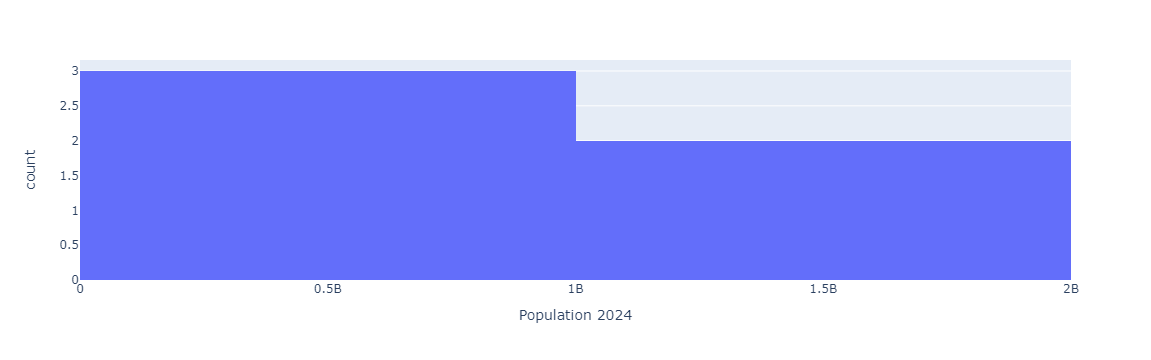

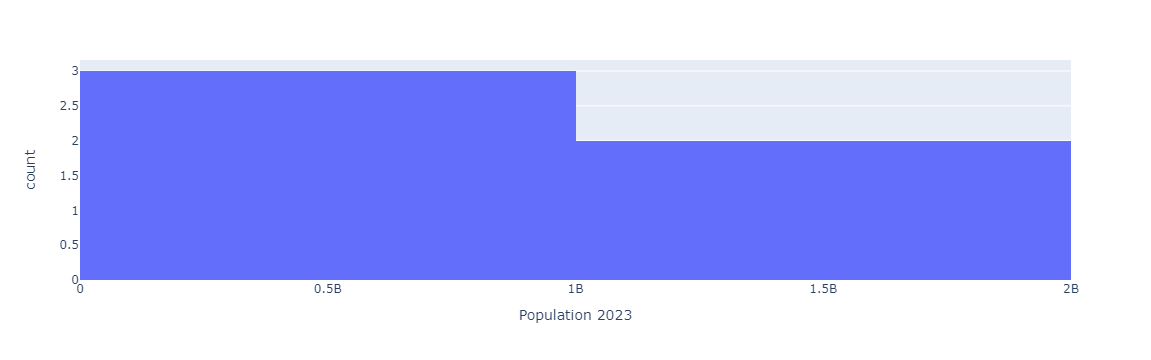

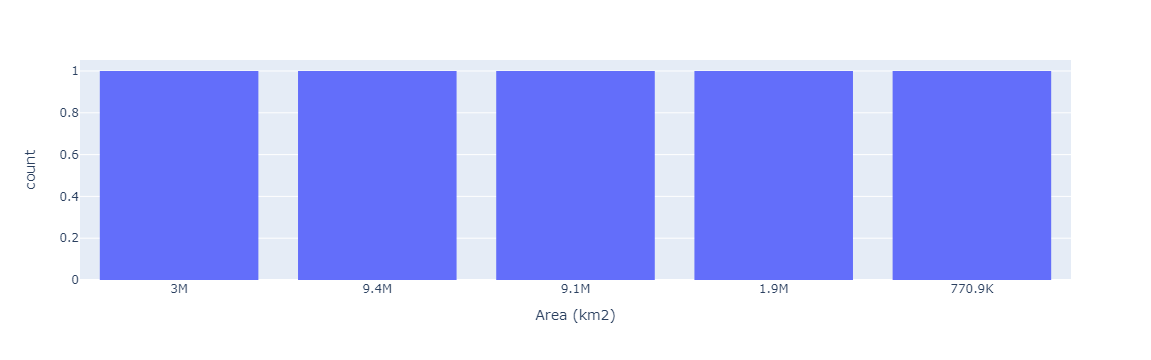

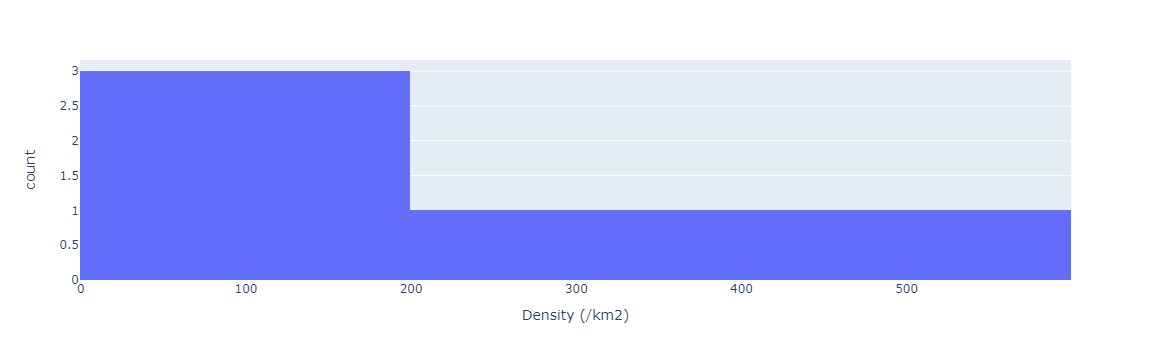

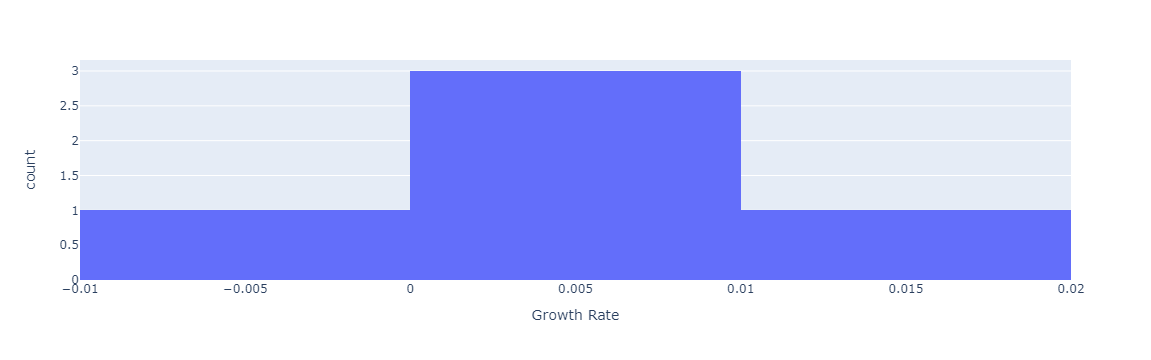

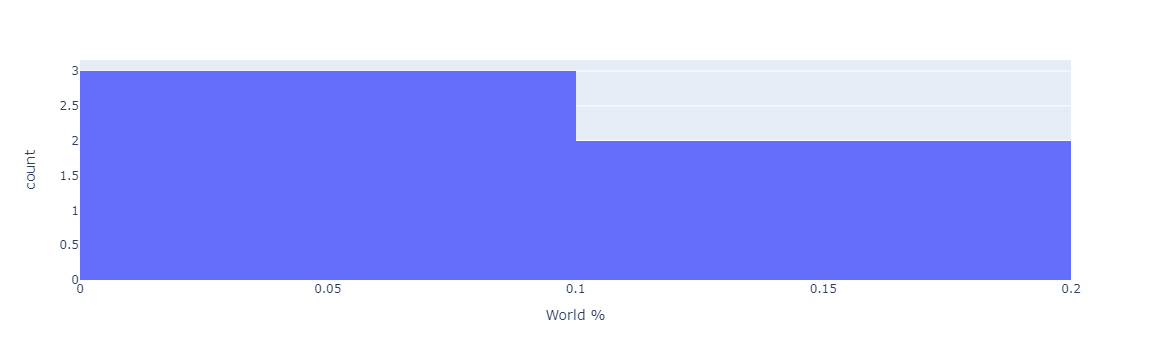

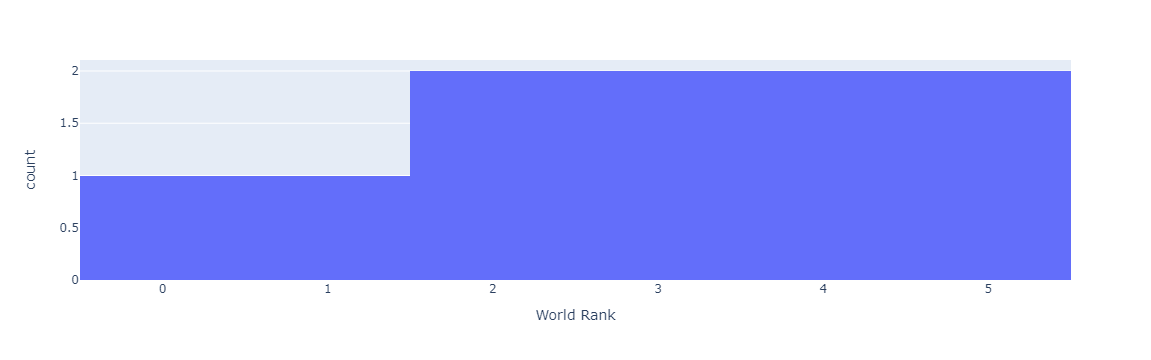

In [20]:
import plotly.express as px
df = pd.DataFrame(df)

columns = ['Country',
 'Population 2024',
 'Population 2023',
 'Area (km2)',
 'Density (/km2)',
 'Growth Rate',
 'World %',
 'World Rank']

for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

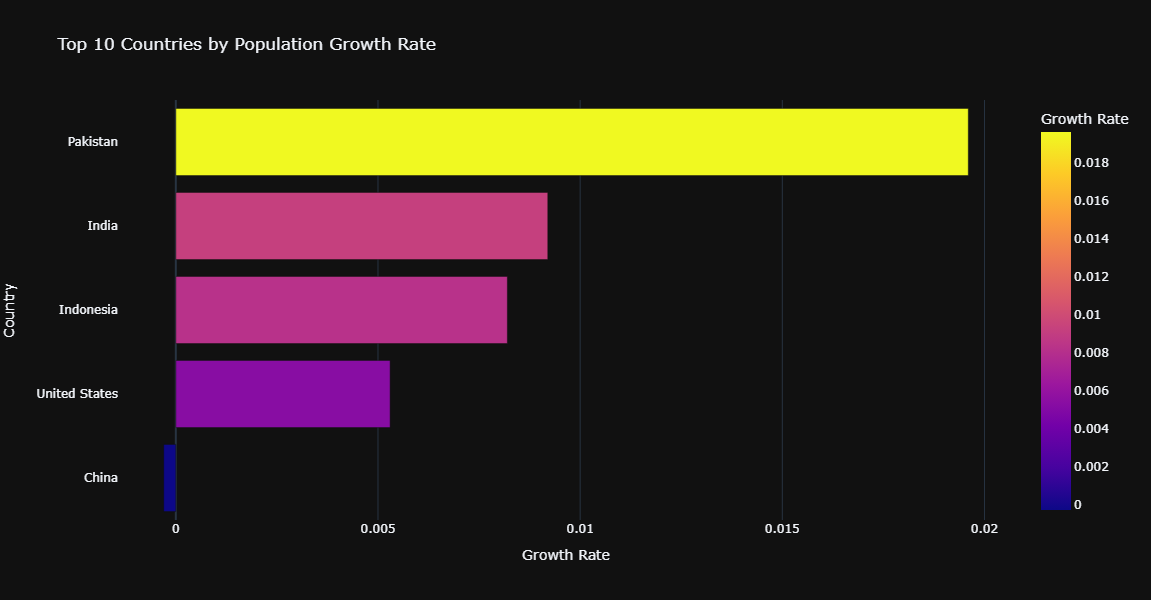

In [21]:
fig = px.bar(df.nlargest(10, 'Growth Rate').sort_values('Growth Rate'), 
             x='Growth Rate', y='Country', 
             title='Top 10 Countries by Population Growth Rate',
             labels={'Growth Rate': 'Growth Rate'},
             color='Growth Rate',
             color_continuous_scale=px.colors.sequential.Plasma,
             height=600)
fig.update_layout(xaxis_title='Growth Rate', yaxis_title='Country', template='plotly_dark')
fig.show()

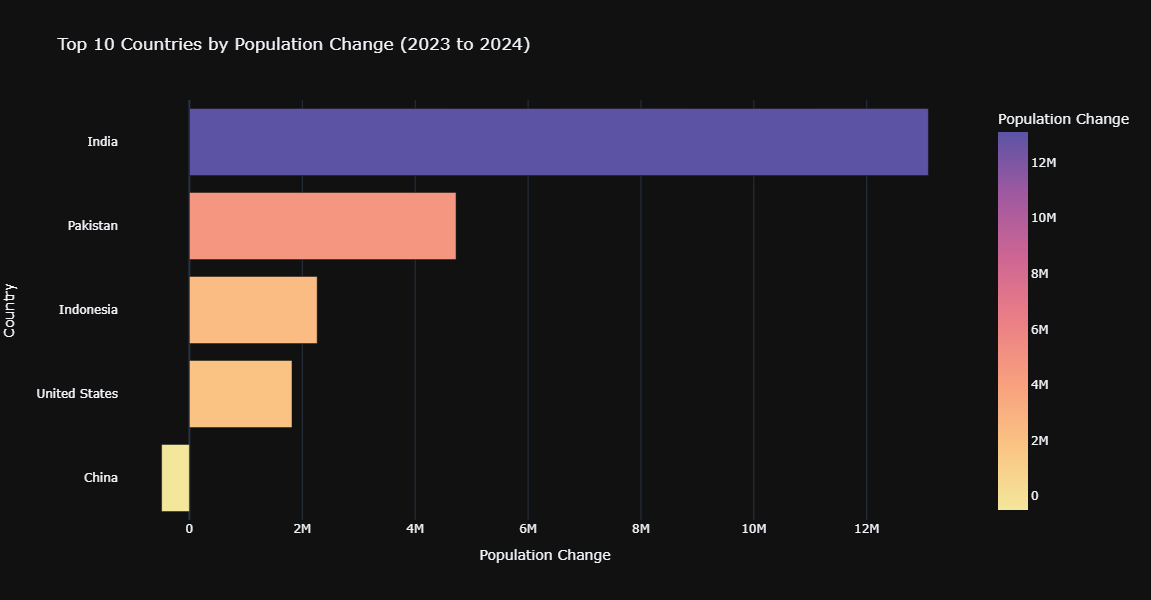

In [22]:
# Calculate the population change
df['Population Change'] = df['Population 2024'] - df['Population 2023']

# Bar plot of the top 10 countries by population change
fig = px.bar(df.nlargest(10, 'Population Change').sort_values('Population Change'), 
             x='Population Change', y='Country', 
             title='Top 10 Countries by Population Change (2023 to 2024)',
             labels={'Population Change': 'Population Change'},
             color='Population Change',
             color_continuous_scale=px.colors.sequential.Sunset,
             height=600)
fig.update_layout(xaxis_title='Population Change', yaxis_title='Country', template='plotly_dark')
fig.show()

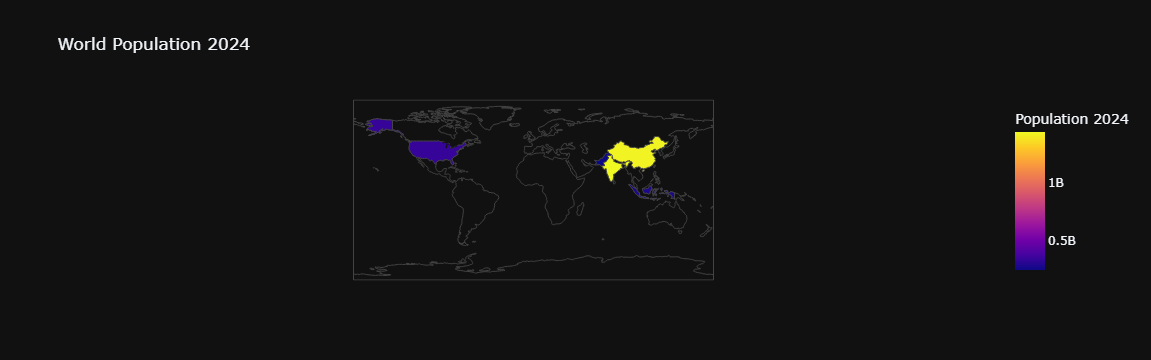

In [23]:
fig = px.choropleth(df, 
                    locations='Country',
                    locationmode='country names',
                    color='Population 2024',
                    hover_name='Country',
                    hover_data=['Population 2023', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='World Population 2024')
fig.update_layout(template='plotly_dark')
fig.show()

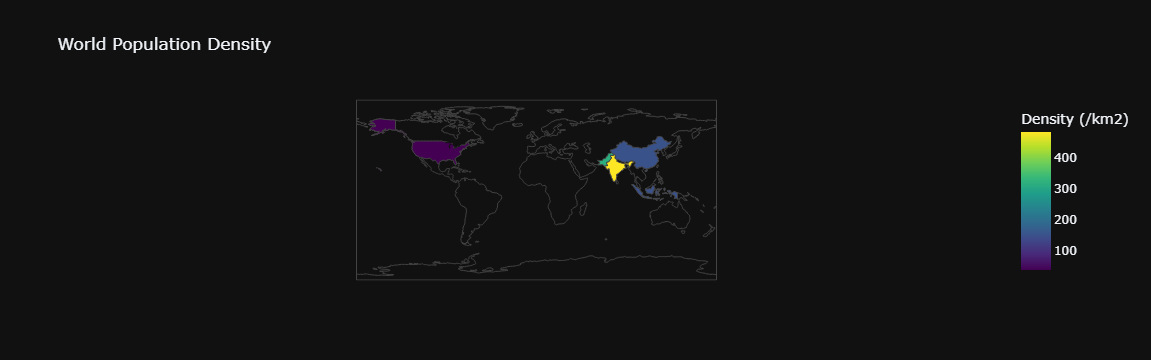

In [24]:
fig = px.choropleth(df, 
                    locations='Country',
                    locationmode='country names',
                    color='Density (/km2)',
                    hover_name='Country',
                    hover_data=['Population 2024', 'Population 2023', 'Area (km2)', 'Growth Rate', 'World %', 'World Rank'],
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='World Population Density')
fig.update_layout(template='plotly_dark')
fig.show()

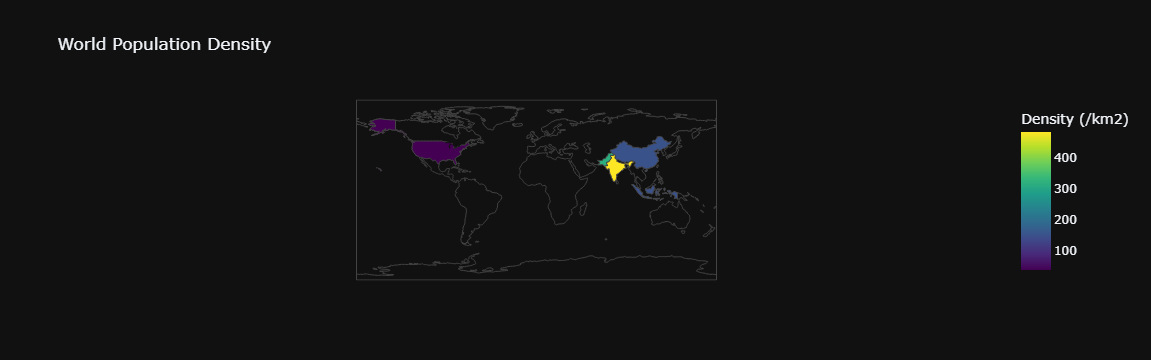

In [25]:
fig = px.choropleth(df, 
                    locations='Country',
                    locationmode='country names',
                    color='Density (/km2)',
                    hover_name='Country',
                    hover_data=['Population 2024', 'Population 2023', 'Area (km2)', 'Growth Rate', 'World %', 'World Rank'],
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='World Population Density')
fig.update_layout(template='plotly_dark')
fig.show()

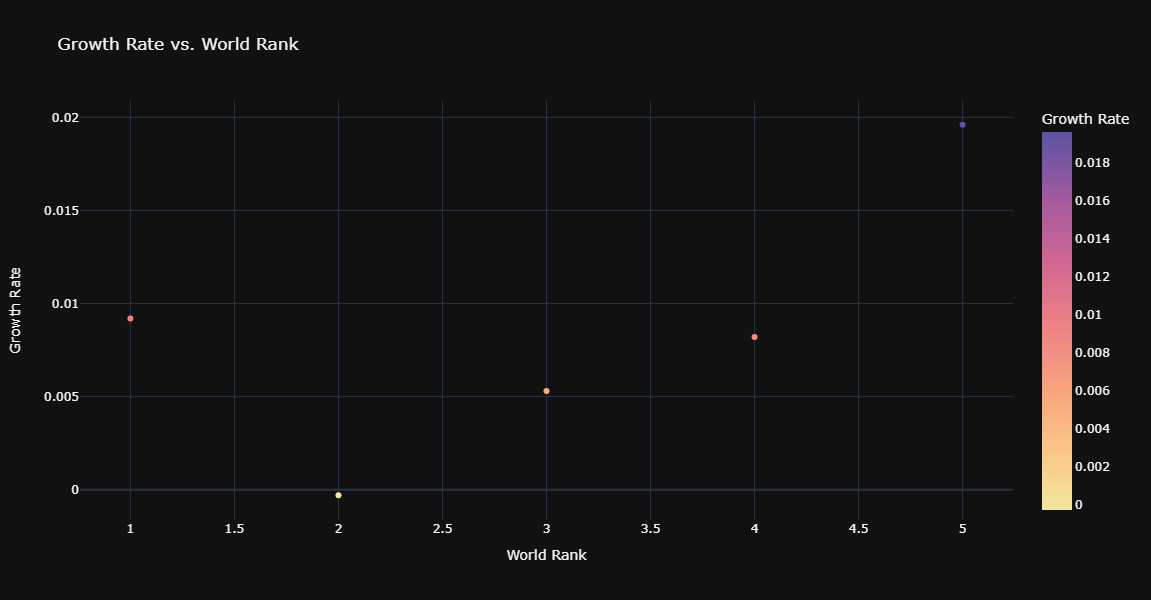

In [26]:
fig = px.scatter(df, x='World Rank', y='Growth Rate',
                 title='Growth Rate vs. World Rank',
                 labels={'World Rank': 'World Rank', 'Growth Rate': 'Growth Rate'},
                 hover_name='Country',
                 hover_data=['Population 2024', 'Population 2023', 'Area (km2)', 'Density (/km2)', 'World %'],
                 color='Growth Rate',
                 color_continuous_scale=px.colors.sequential.Sunset,
                 height=600)
fig.update_layout(xaxis_title='World Rank', yaxis_title='Growth Rate', template='plotly_dark')
fig.show()

In [27]:
df

Country  Population 2024  Population 2023 Area (km2)  Density (/km2)  \
0          India       1441719852       1428627663         3M           485.0   
1          China       1425178782       1425671352       9.4M           151.0   
2  United States        341814420        339996563       9.1M            37.0   
3      Indonesia        279798049        277534122       1.9M           149.0   
4       Pakistan        245209815        240485658     770.9K           318.0   

   Growth Rate  World %  World Rank  Population Change  
0       0.0092   0.1801           1           13092189  
1      -0.0003   0.1780           2            -492570  
2       0.0053   0.0427           3            1817857  
3       0.0082   0.0350           4            2263927  
4       0.0196   0.0306           5            4724157

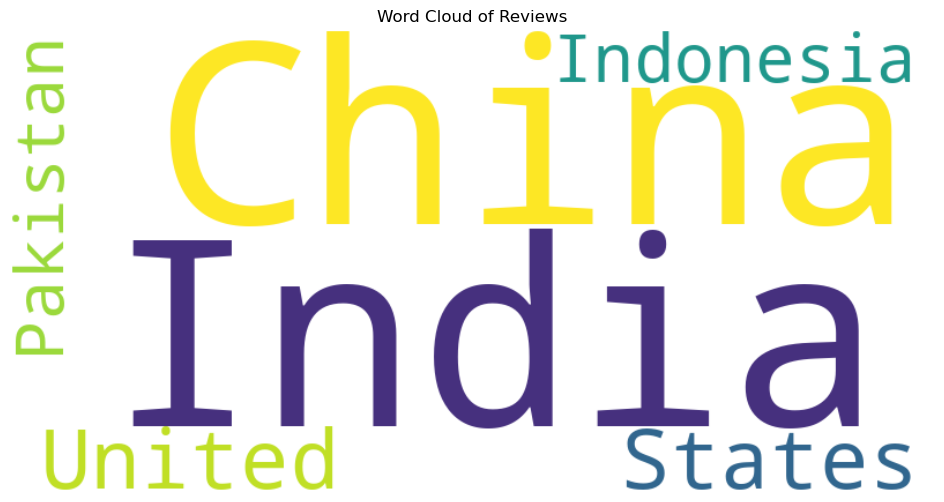

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all items in the 'NAME_OF_CHANNEL' column are strings
reviews_text = ' '.join(df['Country'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()